In [18]:
import os
import time
import pandas as pd
import numpy as np
import datashader as ds
import datashader.transfer_functions as tf
from sklearn.cluster import DBSCAN

In [19]:
# Load from HDF5 file

project = os.path.realpath('./..')
datadir = os.path.join(project, 'data')

with pd.HDFStore(os.path.join(datadir, 'tweets_1M.h5')) as store:
    subset = store.tweets_subset

In [20]:
# Convert the lat and lng columns to numpy array
data = subset.as_matrix(columns=['lat', 'lng'])

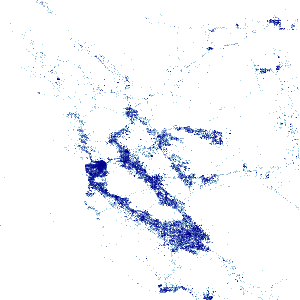

In [21]:
# Visualize points with datashader

cvs = ds.Canvas(plot_width=300, plot_height=300)
agg = cvs.points(subset, 'lng', 'lat')
tf.interpolate(agg)

In [31]:
# Prepare the DBSCAN model object

from __future__ import division

miles = .75

# Rough approximation: 100 km / 1 degree lat or long
kilometers = miles / 0.621371
degrees = kilometers / 100

db = DBSCAN(eps=degrees,
            min_samples=100)

In [32]:
# Start timer
t0 = time.time()

# Fit the data and save timing
db.fit(data)
db_time = time.time() - t0
print db_time

# Add fitted label back into DataFrame
subset['cluster'] = db.labels_

2.2326669693


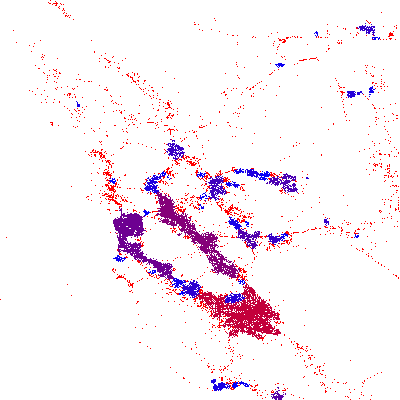

In [33]:
# Visualize points with datashader
cvs = ds.Canvas(plot_width=400, plot_height=400)
agg = cvs.points(subset, 'lng', 'lat', ds.mean('cluster'))
tf.interpolate(agg, cmap=['red', 'blue'])

In [34]:
subset.head()

,id,lat,lng,text,timeStamp,user_id,cluster
548401,382659014066069504,38.475038,-122.814960,@PairingsEd seriously! Just started too #foodi...,2013-09-25 00:13:13,48737246,-1
411317,381561498083930112,37.360357,-122.004599,@andweealol AYYYY WE OUT HERE,2013-09-21 23:32:04,594059393,0
775335,384486127261851648,37.869231,-122.290983,#Ponuzo by the bro @HandleOfLife drops soon. G...,2013-09-30 01:13:30,235498242,1
788161,384543835205824513,37.564399,-122.294308,@alaany2 like I'd adopt you but that's weird b...,2013-09-30 05:02:49,142078918,2
306738,380711938272935937,37.735391,-122.437684,@jrostar @MattBeNimble You guys evaluated Citr...,2013-09-19 15:16:14,76858863,2


In [35]:
subset.cluster.value_counts()

 2     29192
 0     21271
 1     17849
-1      9356
 5      1977
 6      1810
 11     1715
 15     1389
 7      1360
 4      1311
 3      1231
 17     1186
 9      1061
 13      974
 8       685
 21      595
 14      552
 19      541
 18      526
 16      507
 22      409
 27      398
 32      393
 26      345
 24      291
 23      233
 28      218
 30      214
 20      205
 29      175
 36      168
 31      163
 35      156
 10      149
 34      145
 38      139
 40      129
 12      128
 33      125
 39      123
 42      119
 37      113
 25      106
 41      101
 44       90
 43       77
Name: cluster, dtype: int64